# Data Preprocessing Notebook
- Notebook to load and explore fashion mnist data distribution
- Perform data scaling and PCA for modeling
- Save transformed datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
train_df = pd.read_csv('data/fashion-mnist_train.csv')
test_df = pd.read_csv('data/fashion-mnist_test.csv')

In [5]:
# separate features and labels
X_train_raw = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

X_test_raw = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print(f"Training Shape: {X_train_raw.shape}")
print(f"Testing Shape:  {X_test_raw.shape}")

Training Shape: (60000, 784)
Testing Shape:  (10000, 784)


In [6]:
# map labels to actual names
label_map = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover',
             3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt',
             7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

## 1a: Frequency Table

In [8]:
train_counts = pd.Series(y_train).value_counts().sort_index()
train_freq = pd.DataFrame({
    'Label': train_counts.index.map(label_map),
    'Count': train_counts.values,
    'Percent': (train_counts.values / len(y_train) * 100).round(2)})
print("\nTraining Data Distribution:")
print(train_freq)

test_counts = pd.Series(y_test).value_counts().sort_index()
test_freq = pd.DataFrame({
    'Label': test_counts.index.map(label_map),
    'Count': test_counts.values,
    'Percent': (test_counts.values / len(y_test) * 100).round(2)})
print("\nTesting Data Distribution:")
print(test_freq)


Training Data Distribution:
         Label  Count  Percent
0  T-shirt/top   6000     10.0
1      Trouser   6000     10.0
2     Pullover   6000     10.0
3        Dress   6000     10.0
4         Coat   6000     10.0
5       Sandal   6000     10.0
6        Shirt   6000     10.0
7      Sneaker   6000     10.0
8          Bag   6000     10.0
9   Ankle boot   6000     10.0

Testing Data Distribution:
         Label  Count  Percent
0  T-shirt/top   1000     10.0
1      Trouser   1000     10.0
2     Pullover   1000     10.0
3        Dress   1000     10.0
4         Coat   1000     10.0
5       Sandal   1000     10.0
6        Shirt   1000     10.0
7      Sneaker   1000     10.0
8          Bag   1000     10.0
9   Ankle boot   1000     10.0


## Scaling Standardization

In [10]:
# necessary scaling for PCA, SVM, K-means
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

## Dimensionality Reduction with PCA

In [12]:
# fit PCA on training data
pca_full = PCA().fit(X_train_scaled)

# calculate cumulative explained variance
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

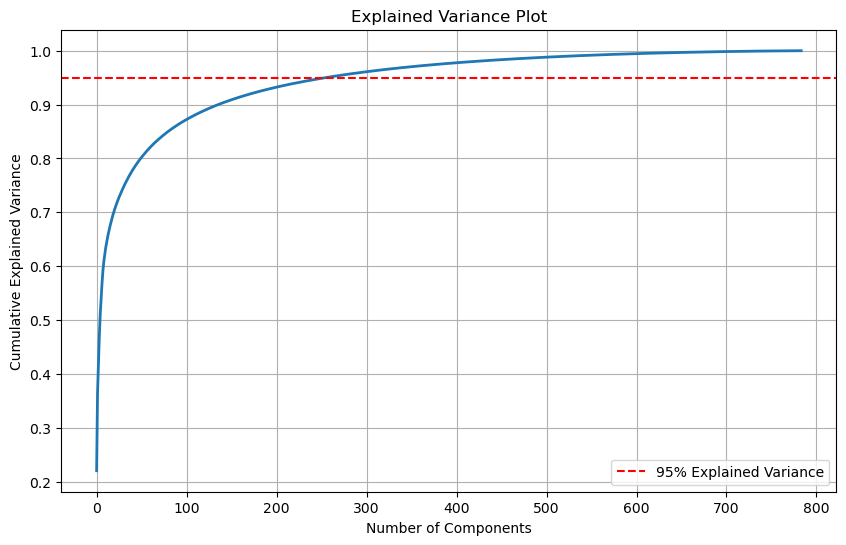

Number of components needed for 95% variance: 256


In [30]:
# explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(cum_var, linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Plot')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# components for 95% variance
n_95 = np.argmax(cum_var >= 0.95) + 1
print(f"Number of components needed for 95% variance: {n_95}")

In [14]:
# run PCA with the chosen components
pca = PCA(n_components=n_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original Feature Shape: {X_train_scaled.shape}")
print(f"PCA Reduced Shape:      {X_train_pca.shape}")

Original Feature Shape: (60000, 784)
PCA Reduced Shape:      (60000, 256)


In [15]:
# save data for future analysis
np.savez_compressed(
    'fashion_mnist_processed.npz',
    X_train_pca=X_train_pca,
    y_train=y_train,
    X_test_pca=X_test_pca,
    y_test=y_test,
    X_train_scaled=X_train_scaled,
    X_test_scaled=X_test_scaled)